In [1]:
import pandas as pd  #pacotes
import numpy as np   #calculo numerico
import glob          #listas
#Codigo para declarar um pyarrow parquet - Willian - 29/05/2018
import pyarrow.parquet as pq
#uproot serve para ler a partir o python um arquivo em tree root
#import uproot
import os, sys
from os import path
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from matplotlib.colors import BoundaryNorm
%matplotlib inline

## MEDIDAS PARA PIETRO (ANALISE BAYSENIANA) ON e OFF 72h CONTINUO

In [2]:
%run def_functions.ipynb
%run def_functions_hits.ipynb
%run def_functions_fits.ipynb


## Salvar e carregar Listas ON / OFF

In [9]:
##save values - h_Sig_OFF2 (contém o sigma de cada bin dividido por 5dias)
def save_PD (dh_PDP, dh_MUP, dh_PDD, dh_MUD, dh_PDT, dh_Sig, sName):
    # dictionary of lists
    dict = {'dh_PDP': dh_PDP,
            'dh_MUP': dh_MUP,
            'dh_PDD': dh_PDD,
            'dh_MUD': dh_MUD,
            'dh_PDT': dh_PDT}
    
    dict2 = {'dh_Sig': dh_Sig}
 
    # creating a dataframe from dictionary
    dfw = pd.DataFrame(dict)
    dfw.to_parquet('data/Analise_ONOFF/'+sName+'.parq', compression='gzip')

    dfw2 = pd.DataFrame(dict2)
    dfw2.to_parquet('data/Analise_ONOFF/Sig_'+sName+'.parq', compression='gzip')

    del dict2
    del dict
    
##load values
def load_PD (sName): #(dh_PDP, dh_PDD, dh_PDT, dh_Sig, sName):
    dfr = pd.read_parquet('data/Analise_ONOFF/'+sName+'.parq')
    dfr2 = pd.read_parquet('data/Analise_ONOFF/Sig_'+sName+'.parq')
    return(dfr['dh_PDP'].values, dfr['dh_MUP'].values, dfr['dh_PDD'].values, dfr['dh_MUD'].values, dfr['dh_PDT'].values, dfr2['dh_Sig'].values)


##save index
def save_DT (dh_dtin_list, dh_dtfn_list, sName):
    # dictionary of lists
    dict = {'dh_dtin_list': dh_dtin_list,
            'dh_dtfn_list': dh_dtfn_list
           }
    
    # creating a dataframe from dictionary
    dfw = pd.DataFrame(dict)
    dfw.to_parquet('data/Analise_ONOFF/'+sName+'.parq', compression='gzip')

    del dict

##load values
def load_DT (sName): #(dh_dtin_list, dh_dtfn_list, sName):
    dfr = pd.read_parquet('data/Analise_ONOFF/'+sName+'.parq')
    return(dfr['dh_dtin_list'].values, dfr['dh_dtfn_list'].values)


### Contagem de período de 168h (7dias) dentro do tempo (8-50us), fora do tempo (58-100us)
### Para análise Baysiana do Pietro

In [4]:
def fnt_process_list_excess (p_list_arq, p_list_period):

    p_list_in = []
    p_list_out = []

    print('sinal - 8us < t < 50us')
    print('ruído - 58us < t')

    for ind, list_arq in enumerate(p_list_arq):
        p_total_in = 0
        p_total_out = 0
        print(p_list_period[ind])
        for file in p_list_arq[ind]:
           # print('  >> '+file)
            ##yyyy=int(sListDt[5:9]); mm=int(sListDt[9:11]); dd=int(sListDt[11:13])
            
            df = pd.read_parquet(file)
            dff_in = df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=7) ## até 7MeV - 28/11/2024
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)  ##  o que muda é o intervalo 8 a 50us
                            &(df['d_mPMTs']>=25)
                       ]
            dff_out = df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=7) ## até 7MeV - 28/11/2024
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=58)   ##  o que muda é maior que 58us
                            &(df['d_mPMTs']>=25)
                        ]
                        
            p_total_in += dff_in.count()[0]
            p_total_out += dff_out.count()[0]
        
        p_list_in.append(p_total_in)
        p_list_out.append(p_total_out)

        #print(p_totalPositrons)
        #break


    return p_list_in, p_list_out

## Processamento do período

## Parte 1: período de 15/06/2020 a 08/09/2020

In [5]:
print('Inicio',datetime.datetime.now())

list_dtin_168h=[]
list_dtfn_168h=[]
list_in=[]
list_out=[]

list_arq_168h, list_dt_168h = find_interval_hour_pair('2020-06-15','2020-09-14', 168) #'2020-12-31', 168)
print(list_dt_168h)
list_in, list_out = fnt_process_list_excess(list_arq_168h, list_dt_168h)

#print('\n', list_dt_168h)
#print('\n\n', list_in)
#print('\n\n', list_out)
        
print('Fim',datetime.datetime.now())

Inicio 2024-11-28 01:23:47.257918
found data/20200615
found data/20200616
found data/20200617
found data/20200618
found data/20200619
found data/20200620
found data/20200621
found data/20200622
found data/20200623
found data/20200624
found data/20200625
found data/20200626
found data/20200627
found data/20200628
found data/20200629
found data/20200630
found data/20200701
found data/20200702
found data/20200703
found data/20200704
found data/20200705
found data/20200706
found data/20200707
found data/20200708
found data/20200709
found data/20200710
found data/20200711
found data/20200712
found data/20200713
found data/20200714
found data/20200715
found data/20200716
found data/20200717
found data/20200718
found data/20200719
found data/20200720
found data/20200721
found data/20200722
found data/20200723
found data/20200724
found data/20200725
found data/20200726
found data/20200727
found data/20200728
found data/20200729
found data/20200730
found data/20200731
found data/20200801
found 

In [6]:
list_tot = [list_dt_168h, list_in, list_out]
print(list_tot)

[[['2020-06-15', '2020-06-22'], ['2020-06-22', '2020-06-29'], ['2020-06-29', '2020-07-06'], ['2020-07-06', '2020-07-13'], ['2020-07-13', '2020-07-20'], ['2020-07-20', '2020-07-27'], ['2020-07-27', '2020-08-03'], ['2020-08-03', '2020-08-10'], ['2020-08-10', '2020-08-17'], ['2020-08-17', '2020-08-25'], ['2020-08-25', '2020-09-01'], ['2020-09-01', '2020-09-08']], [26809, 27949, 28152, 28997, 26949, 27182, 25972, 26069, 27902, 27627, 28983, 29991], [549910, 568588, 573868, 580017, 553343, 562043, 545090, 538028, 579843, 561472, 574574, 562103]]


## Parte 2: segundo período

In [7]:
print('Inicio',datetime.datetime.now())

list_dtin_168h_2=[]
list_dtfn_168h_2=[]
list_in_2=[]
list_out_2=[]

list_arq_168h_2, list_dt_168h_2 = find_interval_hour_pair('2020-09-24','2020-12-31', 168) #'2020-12-31', 168)
print(list_dt_168h_2)
list_in_2, list_out_2 = fnt_process_list_excess(list_arq_168h_2, list_dt_168h_2)

#print('\n', list_dt_168h)
#print('\n\n', list_in)
#print('\n\n', list_out)
        
print('Fim',datetime.datetime.now())

Inicio 2024-11-28 04:25:52.155146
found data/20200924
found data/20200925
found data/20200926
found data/20200927
found data/20200928
found data/20200929
found data/20200930
found data/20201001
found data/20201002
found data/20201003
found data/20201004
found data/20201005
found data/20201006
found data/20201007
found data/20201008
found data/20201009
found data/20201010
found data/20201011
found data/20201012
found data/20201013
found data/20201014
found data/20201015
found data/20201016
found data/20201017
found data/20201018
found data/20201019
found data/20201020
found data/20201021
found data/20201022
found data/20201023
found data/20201024
found data/20201025
found data/20201026
found data/20201027
found data/20201028
found data/20201029
found data/20201030
found data/20201031
found data/20201101
found data/20201102
found data/20201103
found data/20201104
found data/20201105
found data/20201106
found data/20201107
found data/20201108
found data/20201109
found data/20201110
found 

## Semana isolada de 141h: 08/09/2020 - 13/09/2020

In [8]:
print('Inicio',datetime.datetime.now())

list_dtin_168h_1i=[]
list_dtfn_168h_1i=[]
list_in_1i=[]
list_out_1i=[]

list_arq_168h_1i, list_dt_168h_1i = find_interval_hour_pair('2020-09-08','2020-09-13', 141)
print(list_dt_168h_1i)
list_in_1i, list_out_1i = fnt_process_list_excess(list_arq_168h_1i, list_dt_168h_1i)
        
print('Fim',datetime.datetime.now())

Inicio 2024-11-28 07:41:43.353609
found data/20200908
found data/20200909
found data/20200910
found data/20200911
found data/20200912
found data/20200913
[['2020-09-08', '2020-09-13']]
sinal - 8us < t < 50us
ruído - 58us < t
['2020-09-08', '2020-09-13']
Fim 2024-11-28 07:54:40.901373


## Semana isolada de 164h: 25/12/2020 - 31/12/2020

In [9]:
print('Inicio',datetime.datetime.now())

list_dtin_168h_2i=[]
list_dtfn_168h_2i=[]
list_in_2i=[]
list_out_2i=[]

list_arq_168h_2i, list_dt_168h_2i = find_interval_hour_pair('2020-12-25','2020-12-31', 164)
print(list_dt_168h_2i)
list_in_2i, list_out_2i = fnt_process_list_excess(list_arq_168h_2i, list_dt_168h_2i)
        
print('Fim',datetime.datetime.now())

Inicio 2024-11-28 07:54:40.964670
found data/20201225
found data/20201226
found data/20201227
found data/20201228
found data/20201229
found data/20201230
found data/20201231
[['2020-12-25', '2020-12-31']]
sinal - 8us < t < 50us
ruído - 58us < t
['2020-12-25', '2020-12-31']
Fim 2024-11-28 08:09:25.057863


## Result in print

In [10]:
for ind in range(len(list_in)):
    print('Record ('+str(ind+1)+'): '+list_dt_168h[ind][0]+' - '+list_dt_168h[ind][1]+' >> in: '+str(list_in[ind])+', out: '+str(list_out[ind]))
    
for ind_1i in range(len(list_in_1i)):
    print('Record ('+str(ind_1i+ind+2)+'): '+list_dt_168h_1i[ind_1i][0]+' - '+list_dt_168h_1i[ind_1i][1]+' >> in: '+str(list_in_1i[ind_1i])+', out: '+str(list_out_1i[ind_1i]))
    
for ind_2 in range(len(list_in_2)):
    print('Record ('+str(ind_2+ind_1i+ind+3)+'): '+list_dt_168h_2[ind_2][0]+' - '+list_dt_168h_2[ind_2][1]+' >> in: '+str(list_in_2[ind_2])+', out: '+str(list_out_2[ind_2]))
    
for ind_2i in range(len(list_in_2i)):
    print('Record ('+str(ind_2+ind_1i+ind+4)+'): '+list_dt_168h_2i[ind_2i][0]+' - '+list_dt_168h_2i[ind_2i][1]+' >> in: '+str(list_in_2i[ind_2i])+', out: '+str(list_out_2i[ind_2i]))


Record (1): 2020-06-15 - 2020-06-22 >> in: 26809, out: 549910
Record (2): 2020-06-22 - 2020-06-29 >> in: 27949, out: 568588
Record (3): 2020-06-29 - 2020-07-06 >> in: 28152, out: 573868
Record (4): 2020-07-06 - 2020-07-13 >> in: 28997, out: 580017
Record (5): 2020-07-13 - 2020-07-20 >> in: 26949, out: 553343
Record (6): 2020-07-20 - 2020-07-27 >> in: 27182, out: 562043
Record (7): 2020-07-27 - 2020-08-03 >> in: 25972, out: 545090
Record (8): 2020-08-03 - 2020-08-10 >> in: 26069, out: 538028
Record (9): 2020-08-10 - 2020-08-17 >> in: 27902, out: 579843
Record (10): 2020-08-17 - 2020-08-25 >> in: 27627, out: 561472
Record (11): 2020-08-25 - 2020-09-01 >> in: 28983, out: 574574
Record (12): 2020-09-01 - 2020-09-08 >> in: 29991, out: 562103
Record (13): 2020-09-08 - 2020-09-13 >> in: 25917, out: 474689
Record (14): 2020-09-24 - 2020-10-01 >> in: 29840, out: 580017
Record (15): 2020-10-01 - 2020-10-08 >> in: 30258, out: 599563
Record (16): 2020-10-08 - 2020-10-15 >> in: 30565, out: 585181
R

## FIM

## Non

In [17]:
print('Inicio',datetime.datetime.now())

list_dtin_168h=[]
list_dtfn_168h=[]

list_arq_168h, list_dt_168h = find_interval_hour_pair('2020-06-15','2020-06-16', 24) #'2020-12-31', 168)

for ind, list_168h in enumerate(list_arq_168h):
    print('\nIndex - '+str(ind)+' - ',datetime.datetime.now())
 
    h_PDP_Sgn = [] 
    h_PDD_Sgn = []
    h_PDT_Sgn = []
    h_PD_pPDF_Sgn = [] 
    h_MUP_Sgn = [] 
    h_MUD_Sgn = [] 
    totalPositrons_Sgn = 0
    totalNonSat_Sgn = 0
    h_Sig_Sgn = []
    #totalTime_Sgn = 0
    h_PDP_Bck = []
    h_PDD_Bck = []
    h_PDT_Bck = []
    h_PD_pPDF_Bck = [] 
    h_MUP_Bck = [] 
    h_MUD_Bck = [] 
    totalPositrons_Bck = 0
    totalNonSat_Bck = 0
    h_Sig_Bck = []
    #totalTime_Bck = 0

    #print(ind, list_168h,'\n') fnt_process_list_PD
    totalPositrons_Sgn, totalNonSat_Sgn, h_Sig_Sgn = fnt_process_list_PD(list_168h, h_PDP_Sgn, h_PDD_Sgn, h_PDT_Sgn, h_PD_pPDF_Sgn, h_MUP_Sgn, h_MUD_Sgn, bins_interval, 1)
    totalPositrons_Bck, totalNonSat_Bck, h_Sig_Bck = fnt_process_list_PD(list_168h, h_PDP_Bck, h_PDD_Bck, h_PDT_Bck, h_PD_pPDF_Bck, h_MUP_Bck, h_MUD_Bck, bins_interval, 2)
    #totalTime_Sgn = fnt_process_list_PD(list_168h, h_PDP_Sgn,..... h_PDD_Sgn, h_PDT_Sgn, 1)
    #totalTime_Bck = fnt_process_list_PD(list_168h, h_PDP_Bck,..... h_PDD_Bck, h_PDT_Bck, 2)
    #save_PD (h_PDP_Sgn, h_PDD_Sgn, h_PDT_Sgn, 'PD_SGN_Excess_168h_ind_'+str(ind)) #Sinal
    save_PD (h_PDP_Sgn, h_MUP_Sgn, h_PDD_Sgn, h_MUD_Sgn, h_PDT_Sgn, hg_Sig_Sgn, 'PD_SGN_Excess_168h_ind_'+str(ind)) #Sinal
    #save_PD (h_PDP_Bck, h_PDD_Bck, h_PDT_Bck, 'PD_BCK_Excess_168h_ind_'+str(ind)) #Sinal
    save_PD (h_PDP_Bck, h_MUP_Bck, h_PDD_Bck, h_MUD_Bck, h_PDT_Bck, hg_Sig_Bck, 'PD_BCK_Excess_168h_ind_'+str(ind)) #Sinal
    list_dtin_168h.append(list_dt_168h[ind][0])
    list_dtfn_168h.append(list_dt_168h[ind][1])
                            
    print('Data Inicial: ',list_dt_168h[ind][0],', Data Final: ',list_dt_168h[ind][1])
    print('Count signal: ',len(h_PDP_Sgn),', count background: ',len(h_PDP_Bck))
   # print('Time signal: ',totalTime_Sgn,', time background: ',totalTime_Bck)

print('\n', list_dtin_168h, list_dtfn_168h)
save_DT (list_dtin_168h, list_dtfn_168h, 'PD_Index_Excess_168h')


        
print('Fim',datetime.datetime.now())

Inicio 2024-08-04 16:51:41.428120
found data/20200615
found data/20200616

Index - 0 -  2024-08-04 16:51:41.449029
sinal v2 - 8us < t < 50us
data/20200615\AngraRun_1592190172415_processed_pair.parq
data/20200615
calculando bin
data/20200615\AngraRun_1592191976970_processed_pair.parq
data/20200615
calculando bin
data/20200615\AngraRun_1592193786559_processed_pair.parq
data/20200615


KeyboardInterrupt: 

In [42]:
print('Inicio',datetime.datetime.now())

list_dtin_72h_f=[]
list_dtfn_72h_f=[]
list_totalEv = []

list_arq_72h, list_dt_72h = find_interval_hour_pair('2020-06-15','2020-12-31', 72)

for ind, list_72h in enumerate(list_arq_72h):
    print('\nIndex - '+str(ind)+' - ',datetime.datetime.now())
    
    totalEv = 0
    #print(ind, list_72h,'\n')
    totalEv = fnt_process_list_Freq(list_72h)

    list_dtin_72h_f.append(list_dt_72h[ind][0])
    list_dtfn_72h_f.append(list_dt_72h[ind][1])
    list_totalEv.append(totalEv)
                            
    print('Data Inicial: ',list_dt_72h[ind][0],', Data Final: ',list_dt_72h[ind][1])
    print(' >> Count events: ',totalEv)

print('\n', list_dtin_72h_f, list_dtfn_72h_f)
# save_DT (list_dtin_72h, list_dtfn_72h, 'PD_Index_Michel_72h')
        
print('Fim',datetime.datetime.now())

Inicio 2024-05-27 15:21:10.371514
found data/20200615
found data/20200616
found data/20200617
found data/20200618
found data/20200619
path not exists data/20200620
path not exists data/20200621
found data/20200622
found data/20200623
found data/20200624
found data/20200625
found data/20200626
found data/20200627
found data/20200628
found data/20200629
found data/20200630
found data/20200701
found data/20200702
found data/20200703
found data/20200704
found data/20200705
found data/20200706
found data/20200707
found data/20200708
found data/20200709
found data/20200710
found data/20200711
found data/20200712
found data/20200713
found data/20200714
found data/20200715
found data/20200716
found data/20200717
found data/20200718
found data/20200719
found data/20200720
found data/20200721
found data/20200722
found data/20200723
found data/20200724
found data/20200725
found data/20200726
found data/20200727
found data/20200728
found data/20200729
found data/20200730
found data/20200731
found 

KeyboardInterrupt: 

## Load

In [10]:
h_PDP_Sgn=[]
h_PDD_Sgn=[]
h_PDT_Sgn=[]

h_PDP_Sgn, h_PDD_Sgn, h_PDT_Sgn = load_PD ('PD_SGN_Michel_72h_ind_0')  #Sinal

print(h_PDP_Sgn)

[642.43201642 810.22319138 682.67060031 ... 751.60338635 909.3637763
 900.91072345]


In [11]:
h_PDP_Bck=[]
h_PDD_Bck=[]
h_PDT_Bck=[]

h_PDP_Bck, h_PDD_Bck, h_PDT_Bck = load_PD ('PD_BCK_Michel_72h_ind_0')  #Sinal

print(h_PDP_Bck)

[686.7367881  773.08876347 731.41354541 ... 735.1975372  878.84812724
 791.86762442]


## Análise OFF - 07/2020

## Subtração OFF - 07/2020

## Função para plotar candidatos de Eletron de Michel 

In [8]:
def fnt_trace_fit_EM (p_h_PDD_SGN, p_h_PDD_BCK, p_periodo, p_filename, b_plot = True):


    h_dPDD_SGN = 78 * p_h_PDD_SGN   #em DUQ  1 DUQ = 78pe
    h_dPDD_BCK = 78 * p_h_PDD_BCK

    histograma1_1,steps1_1 = np.histogram(h_dPDD_SGN,bins=np.arange(0,90000,2500)) #, density=True)
    histograma1_2,steps1_2 = np.histogram(h_dPDD_BCK,bins=np.arange(0,90000,2500)) #, density=True)
    h_data = histograma1_1-histograma1_2  #

    params_h, params_covariance_h = optimize.curve_fit(fnt_fit_gauss_2, steps1_1[8:24], h_data[8:24], [450,40000,20000])
    #print(['params h',params_h])

    if (b_plot):
        fig=plt.figure(figsize=(15,10))
        ax = fig.add_subplot(1, 1, 1)

        plt.rcParams.update({'font.size': 10})
        plt.step(steps1_1[:-1], h_data, label='Data - count = {:d}'.format(len(h_dPDD_SGN)),color='red', linewidth=3)
        plt.plot(steps1_1[8:24], fnt_fit_gauss_2(steps1_1[8:24], params_h[0], params_h[1], params_h[2]), 
            label='Fit - amp={:0.0f}, $x_0=${:0.0f}, $\sigma$={:0.0f}'.format(params_h[0], params_h[1], params_h[2]), 
            color='b', linewidth=3)

        plt.ylabel('Eventos', size=16)
        plt.xlabel('DUQ', size=16)
        plt.legend(loc="upper right")
        plt.grid()
        #plt.xlim(0,300)
        #plt.ylim(0,150)

        plt.title('Distribuição de candidatos a elétrons de michel\n'+
             'Período '+p_periodo+'\n'+
             '(1 < t < 6$\mu$s e 50000 < prompt < 75000 DUQ - sinal)\n'+
             '(6 < t < 11$\mu$s e 50000 < prompt < 75000 DUQ - ruído)'
             , size=16,y=1.02)


        plt.savefig('histogramas/'+p_filename+'.png')
        plt.show()
        
        print(h_data[1:9],steps1_1[1:9],sum(h_data[1:9]))
    
    return([params_h[0], params_h[1], params_h[2], sum(h_data[1:9]), sum(h_data[10:25])])  
            #[amplitude, x0, sigma, soma eventos até 20000DUQ, soma eventos de 20000DUQ a 60000DUQ]



## Distribuição 01 - 03/07/2020

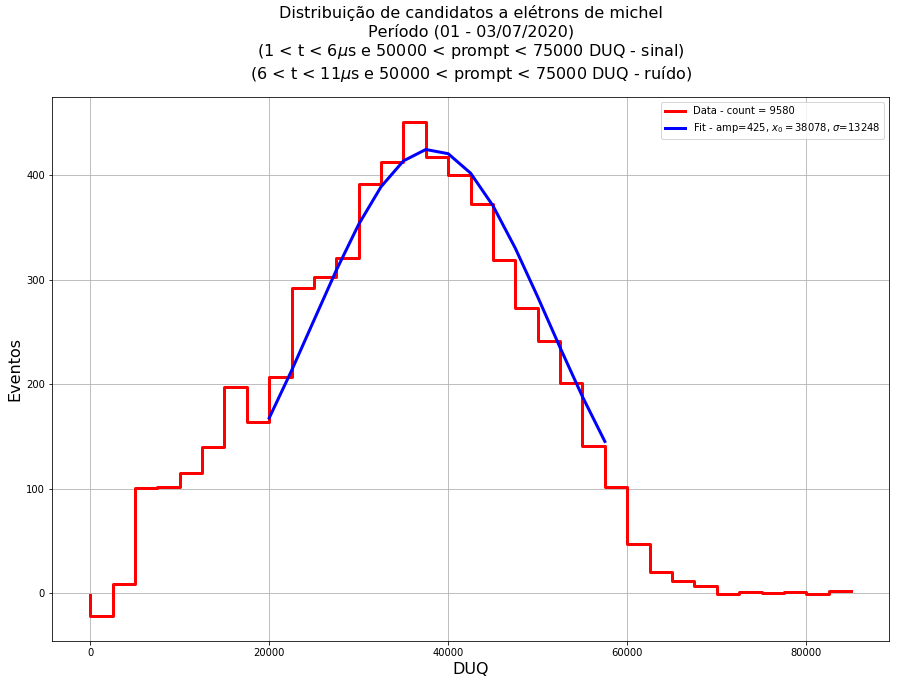

[-22   9 101 102 115 140 197 164] [ 2500  5000  7500 10000 12500 15000 17500 20000] 806


[425.0107557827037, 38078.1817472754, 13248.287742914436, 806, 4638]

In [12]:
fnt_trace_fit_EM(h_PDD_Sgn, h_PDD_Bck,'(01 - 03/07/2020)','Hist_Michel_Sgn_72h_ind_0')

## Gaussian Params over the period

In [13]:
print('Início',datetime.datetime.now())

h_list_dtin, h_list_dtfn = load_DT('PD_Index_Michel_72h')

h_plot_params = []
h_list_dtp = []
h_list_amp = []
h_list_x0 = []
h_list_sigma = []
h_list_ev20kDUQ = []
h_list_ev20_60kDUQ = []

for ind in range(len(h_list_dtin)):
    #print(ind)
    s_ind = str(ind)
    h_PDP_Sgn=[]
    h_PDD_Sgn=[]
    h_PDT_Sgn=[]

    h_PDP_Sgn, h_PDD_Sgn, h_PDT_Sgn = load_PD ('PD_SGN_Michel_72h_ind_'+s_ind)  #Sinal
    #print(h_PDP_Sgn)

    h_PDP_Bck=[]
    h_PDD_Bck=[]
    h_PDT_Bck=[]

    h_PDP_Bck, h_PDD_Bck, h_PDT_Bck = load_PD ('PD_BCK_Michel_72h_ind_'+s_ind)  #ruido
    #print(h_PDP_Bck)

    h_plot_params.append(fnt_trace_fit_EM(h_PDD_Sgn, h_PDD_Bck,'('+h_list_dtin[ind]+' - '+h_list_dtfn[ind]+')','Hist_Michel_Sgn_72h_ind_'+s_ind, False))
    
    h_list_dtp.append(h_list_dtfn[ind])
    h_list_amp.append(h_plot_params[ind][0])
    h_list_x0.append(h_plot_params[ind][1])
    h_list_sigma.append(h_plot_params[ind][2])
    h_list_ev20kDUQ.append(h_plot_params[ind][3])
    h_list_ev20_60kDUQ.append(h_plot_params[ind][4])

#print(h_list_dtp)
#print(h_list_x0)

print('Fim',datetime.datetime.now())

Início 2024-07-23 09:15:32.798520
Fim 2024-07-23 09:15:36.120780


In [22]:
h_list_amp_bak = []
h_list_amp_bak.extend(h_list_amp)
print(h_list_amp_bak)

[425.0107557827037, 463.3593841907191, 460.30186287976426, 453.21045132040877, 465.15088910448935, 488.19845982898084, 462.6728624350837, 471.8058509484882, 449.1672409553824, 459.5171788376587, 455.16356842113044, 445.17840910268524, 471.8173695885706, 451.3688832443766, 465.61973590675495, 453.5071284124762, 456.71868520364455, 459.5097403850571, 455.57813323721126, 450.07393424164366, 455.9743724728928, 454.7729133464831, 441.9712623896974, 424.6047911780598, 437.2444486064502, 399.32643302802535, 414.9226638912507, 397.2266573922207, 421.1511549001224, 410.3639986752407, 415.47920642847305, 412.68032142544115, 437.32949351019727, 415.33516240969476, 428.72839424225594, 416.1371409209273, 417.48085926053125, 386.59765038324696, 431.2686715169393, 417.23899596277363, 435.91573860202936, 418.04511602920934, 442.3479877143404, 435.5026708175703, 442.29360885946903, 425.69362170288554, 434.91791113447863, 433.25742060690607, 445.91500350224777, 423.4922175433265, 431.3319688113351, 434.

In [23]:
h_list_amp.insert(29, float('nan'))
h_list_amp.insert(29, float('nan'))
h_list_amp.insert(29, float('nan'))
h_list_amp.insert(29, float('nan'))
print(h_list_amp)


[425.0107557827037, 463.3593841907191, 460.30186287976426, 453.21045132040877, 465.15088910448935, 488.19845982898084, 462.6728624350837, 471.8058509484882, 449.1672409553824, 459.5171788376587, 455.16356842113044, 445.17840910268524, 471.8173695885706, 451.3688832443766, 465.61973590675495, 453.5071284124762, 456.71868520364455, 459.5097403850571, 455.57813323721126, 450.07393424164366, 455.9743724728928, 454.7729133464831, 441.9712623896974, 424.6047911780598, 437.2444486064502, 399.32643302802535, 414.9226638912507, 397.2266573922207, 421.1511549001224, nan, nan, nan, nan, 410.3639986752407, 415.47920642847305, 412.68032142544115, 437.32949351019727, 415.33516240969476, 428.72839424225594, 416.1371409209273, 417.48085926053125, 386.59765038324696, 431.2686715169393, 417.23899596277363, 435.91573860202936, 418.04511602920934, 442.3479877143404, 435.5026708175703, 442.29360885946903, 425.69362170288554, 434.91791113447863, 433.25742060690607, 445.91500350224777, 423.4922175433265, 431

In [29]:
h_list_x0_bak = []
h_list_x0_bak.extend(h_list_x0)
print(h_list_x0_bak)

[38078.1817472754, 38353.33552017584, 38112.31382944046, 38446.45470939704, 38548.90062200818, 37797.8048579106, 38555.04584736365, 39658.41288405556, 38158.8375630594, 38552.651300898084, 38457.78993419459, 38446.43814939133, 38028.20741139298, 38223.93203518593, 38699.35610863456, 38735.89309326995, 39052.479813788756, 38114.2770610184, 38164.91072103847, 38273.516389641976, 38848.66744446976, 38637.182736444716, 39182.8428653046, 39817.62211836541, 40069.14594986614, 41183.21795886446, 40488.4355945748, 39623.42304637313, 40602.62843160614, 41419.84678631817, 39454.388970571315, 38981.565028387035, 38825.443830268116, 41722.24741167488, 41186.39479362592, 40465.00694773757, 41518.00082171521, 38797.17664110325, 41160.55399774795, 39508.83920103371, 39522.60900925011, 40473.87526297735, 40865.455832511296, 41032.39976050894, 38722.71665420204, 41287.45493513606, 40878.10963445884, 39028.92614740859, 39951.29023935763, 39440.293372319546, 40332.52955899559, 41213.667504451914, 40077.6

In [30]:
h_list_x0.insert(29, float('nan'))
h_list_x0.insert(29, float('nan'))
h_list_x0.insert(29, float('nan'))
h_list_x0.insert(29, float('nan'))
print(h_list_x0)

[38078.1817472754, 38353.33552017584, 38112.31382944046, 38446.45470939704, 38548.90062200818, 37797.8048579106, 38555.04584736365, 39658.41288405556, 38158.8375630594, 38552.651300898084, 38457.78993419459, 38446.43814939133, 38028.20741139298, 38223.93203518593, 38699.35610863456, 38735.89309326995, 39052.479813788756, 38114.2770610184, 38164.91072103847, 38273.516389641976, 38848.66744446976, 38637.182736444716, 39182.8428653046, 39817.62211836541, 40069.14594986614, 41183.21795886446, 40488.4355945748, 39623.42304637313, 40602.62843160614, nan, nan, nan, nan, 41419.84678631817, 39454.388970571315, 38981.565028387035, 38825.443830268116, 41722.24741167488, 41186.39479362592, 40465.00694773757, 41518.00082171521, 38797.17664110325, 41160.55399774795, 39508.83920103371, 39522.60900925011, 40473.87526297735, 40865.455832511296, 41032.39976050894, 38722.71665420204, 41287.45493513606, 40878.10963445884, 39028.92614740859, 39951.29023935763, 39440.293372319546, 40332.52955899559, 41213.6

In [27]:
#print(h_list_dtp)
#print(h_list_x0)

list_dtd_2 = []
list_dtd_2.extend(h_list_dtp)
list_dtd_2.insert(29, '2020-09-23')
list_dtd_2.insert(29, '2020-09-20')
list_dtd_2.insert(29, '2020-09-17')
list_dtd_2.insert(29, '2020-09-14')
print(list_dtd_2)
print(len(list_dtd_2))



['2020-06-18', '2020-06-21', '2020-06-24', '2020-06-27', '2020-06-30', '2020-07-03', '2020-07-06', '2020-07-09', '2020-07-12', '2020-07-15', '2020-07-18', '2020-07-21', '2020-07-24', '2020-07-27', '2020-07-30', '2020-08-03', '2020-08-06', '2020-08-09', '2020-08-12', '2020-08-15', '2020-08-18', '2020-08-21', '2020-08-24', '2020-08-27', '2020-08-30', '2020-09-02', '2020-09-05', '2020-09-08', '2020-09-11', '2020-09-14', '2020-09-17', '2020-09-20', '2020-09-23', '2020-09-25', '2020-09-28', '2020-10-01', '2020-10-04', '2020-10-07', '2020-10-10', '2020-10-13', '2020-10-16', '2020-10-19', '2020-10-22', '2020-10-25', '2020-10-28', '2020-10-31', '2020-11-03', '2020-11-07', '2020-11-10', '2020-11-13', '2020-11-16', '2020-11-19', '2020-11-22', '2020-11-25', '2020-11-28', '2020-12-01', '2020-12-04', '2020-12-07', '2020-12-10', '2020-12-13', '2020-12-17', '2020-12-20', '2020-12-23', '2020-12-26', '2020-12-29']
65


In [95]:
list_dtd_2 = ['2020-06-23', '2020-06-26', '2020-06-29', '2020-07-02', '2020-07-05', '2020-07-08', '2020-07-11', 
              '2020-07-14', '2020-07-17', '2020-07-20', '2020-07-23', '2020-07-26', '2020-07-29', '2020-08-01', 
              '2020-08-04', '2020-08-07', '2020-08-10', '2020-08-13', '2020-08-16', '2020-08-19', '2020-08-22', 
              '2020-08-25', '2020-08-28', '2020-08-31', '2020-09-03', '2020-09-06', '2020-09-09', '2020-09-12', 
              '2020-09-15', '2020-09-18', '2020-09-21', '2020-09-24', '2020-09-27', '2020-09-30', '2020-10-03', 
              '2020-10-06', '2020-10-09', '2020-10-12', '2020-10-15', '2020-10-18', '2020-10-21', '2020-10-24', 
              '2020-10-27', '2020-10-30']
h_list_x0[28]=float('nan')
h_list_x0[29]=float('nan')
h_list_amp[28]=float('nan')
h_list_amp[29]=float('nan')

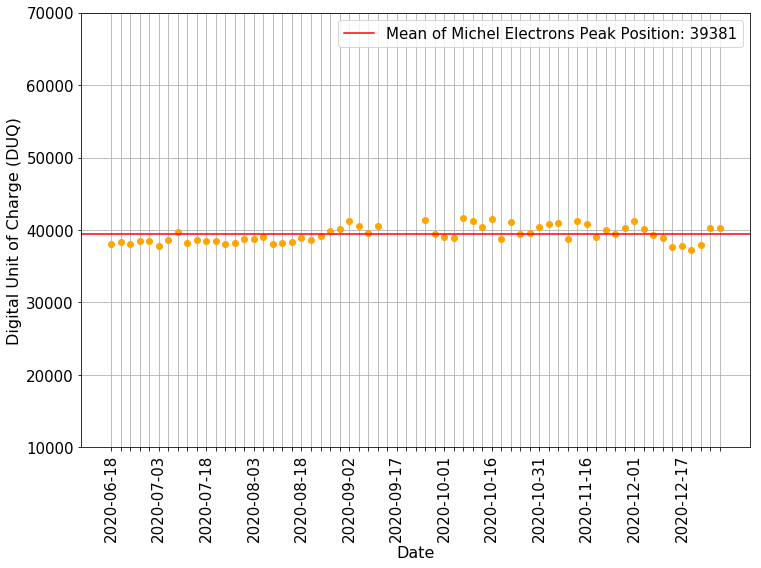

In [31]:

fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 15})

#plt.plot(h_list_dtp, h_list_x0, 'bo', linewidth=3) #, label='centro')
plt.plot(list_dtd_2, h_list_x0, color='orange', marker='o', linewidth=0) #, label='centro')


list_dtd_lab = []
for i in range(len(list_dtd_2)):
    if (i % 5 == 0):
        list_dtd_lab.append(list_dtd_2[i])
    else:
        list_dtd_lab.append('')
        
list_mean_amp = []

for j in range(len(h_list_x0)):
    if (h_list_x0[j]>100):
        list_mean_amp.append(h_list_x0[j])
        
plt.axhline(np.mean(list_mean_amp),color='red',
            label='Mean of Michel Electrons Peak Position: {:.0f}'.format(np.mean(list_mean_amp)))


plt.ylim(10000,70000)

plt.ylabel('Digital Unit of Charge (DUQ)', size=16)
plt.xlabel('Date', size=16)
plt.xticks(list_dtd_2, list_dtd_lab, rotation=90)
plt.legend(loc="upper right")
plt.grid()

#plt.title('Centro das Gaussianas de candidatos a elétrons de michel ao longo do período\n', size=16,y=1.02)
#plt.title('Gaussian Center of then Michel Electrons candidates\n', size=16,y=1.02)

plt.savefig('histogramas/Params_Centro_Gauss_EM.png')
plt.show()




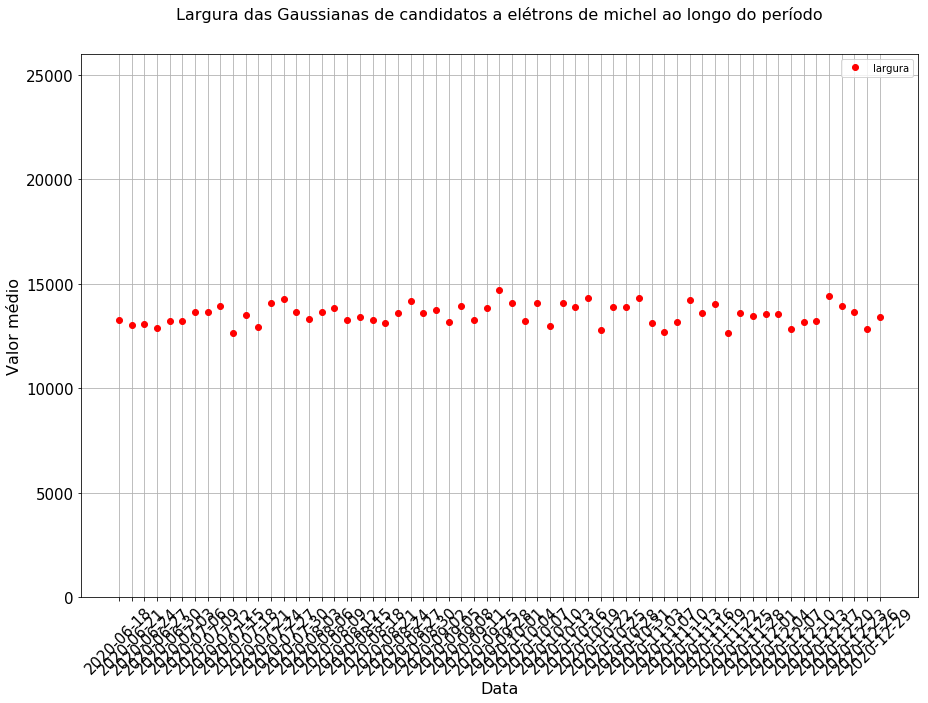

In [32]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 10})

plt.plot(h_list_dtp, h_list_sigma, 'ro', linewidth=3, label='largura')
#plt.plot(h_list_dtp, h_list_amp, 'ro', linewidth=3, label='amplitude')

plt.ylim(0,26000)

plt.ylabel('Valor médio', size=16)
plt.xlabel('Data', size=16)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid()

plt.title('Largura das Gaussianas de candidatos a elétrons de michel ao longo do período\n', size=16,y=1.02)

plt.savefig('histogramas/Params_Larg_Gauss_EM_all.png')
plt.show()


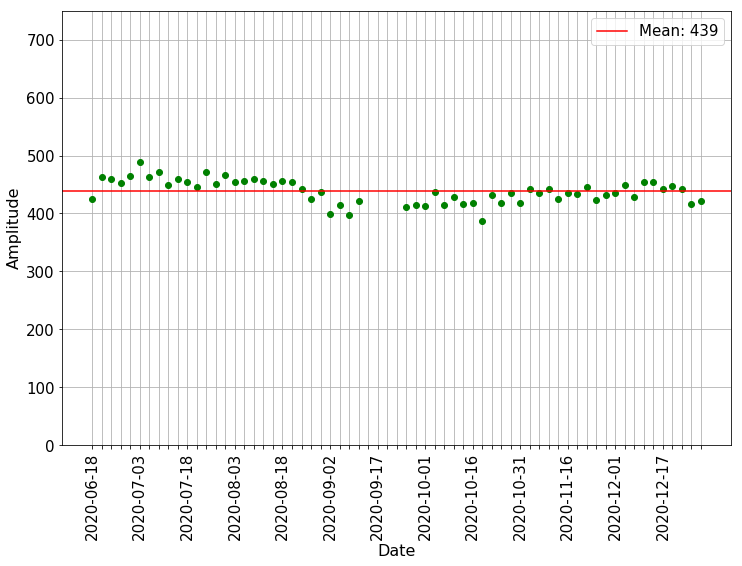

In [28]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 15})

#plt.plot(h_list_dtp, h_list_sigma, 'go', linewidth=3, label='largura')
plt.plot(list_dtd_2, h_list_amp, 'go', linewidth=3) #, label='amplitude')


list_dtd_lab = []
for i in range(len(list_dtd_2)):
    if (i % 5 == 0):
        list_dtd_lab.append(list_dtd_2[i])
    else:
        list_dtd_lab.append('')
        
plt.ylim(0,750)

list_mean_amp = []

for j in range(len(h_list_amp)):
    if (h_list_amp[j]>100):
        list_mean_amp.append(h_list_amp[j])
        
plt.axhline(np.mean(list_mean_amp),color='red',
            label='Mean: {:.0f}'.format(np.mean(list_mean_amp)))


plt.ylabel('Amplitude', size=16)
plt.xlabel('Date', size=16)
plt.xticks(list_dtd_2, list_dtd_lab, rotation=90)
plt.legend(loc="upper right")
plt.grid()

#plt.title('Amplitude das Gaussianas de candidatos a elétrons de michel ao longo do período\n', size=16,y=1.02)

plt.savefig('histogramas/Params_Ampl_Gauss_EM_all.png')
plt.show()


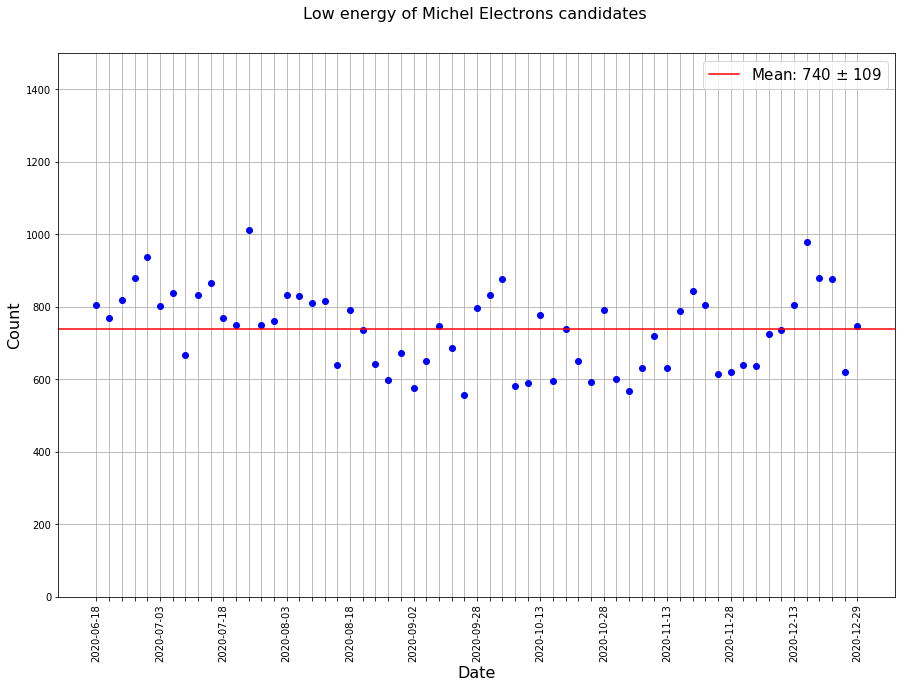

In [33]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 15})

plt.plot(h_list_dtp, h_list_ev20kDUQ, 'bo', linewidth=3) #, label='Soma de eventos até 20KDUQ')

list_dtd_lab = []
for i in range(len(h_list_dtp)):
    if (i % 5 == 0):
        list_dtd_lab.append(h_list_dtp[i])
    else:
        list_dtd_lab.append('')

plt.ylim(0,1500)

plt.axhline(np.mean(h_list_ev20kDUQ),color='red',
            label='Mean: {:.0f} $\pm$ {:.0f}'.format(np.mean(h_list_ev20kDUQ),np.std(h_list_ev20kDUQ)))


plt.ylabel('Count', size=16)
plt.xlabel('Date', size=16)
plt.xticks(h_list_dtp, list_dtd_lab, rotation=90)
plt.legend(loc="upper right")
plt.grid()

#plt.title('Eventos até 20KDUQ ao longo do período\n', size=16,y=1.02)
plt.title('Low energy of Michel Electrons candidates \n', size=16,y=1.02)

plt.savefig('histogramas/Params_ev20KDUQ_all.png')
plt.show()


In [79]:
print((2E6/78) / 72 / 60 / 60)
print(185*0.001)
print(float('nan'))

0.09892371003482116
0.185
nan


In [34]:
h_list_ev20_60kDUQ_bak = []
h_list_ev20_60kDUQ_bak.extend(h_list_ev20_60kDUQ)
print(h_list_ev20_60kDUQ_bak)

[4638, 5002, 4925, 4850, 5071, 5267, 5099, 5237, 5017, 4872, 5029, 4801, 5228, 5031, 5187, 4939, 5088, 5076, 4947, 4939, 4954, 4934, 4912, 4852, 4871, 4523, 4523, 4407, 4617, 4636, 4756, 4582, 4727, 4740, 4677, 4695, 4699, 4298, 4619, 4642, 4895, 4735, 4891, 4705, 4776, 4816, 4824, 4856, 4765, 4694, 4765, 4863, 5002, 4589, 4997, 4898, 4950, 4869, 4823, 4466, 4615]


In [35]:
h_list_ev20_60kDUQ.insert(29, float('nan'))
h_list_ev20_60kDUQ.insert(29, float('nan'))
h_list_ev20_60kDUQ.insert(29, float('nan'))
h_list_ev20_60kDUQ.insert(29, float('nan'))
print(h_list_ev20_60kDUQ)

[4638, 5002, 4925, 4850, 5071, 5267, 5099, 5237, 5017, 4872, 5029, 4801, 5228, 5031, 5187, 4939, 5088, 5076, 4947, 4939, 4954, 4934, 4912, 4852, 4871, 4523, 4523, 4407, 4617, nan, nan, nan, nan, 4636, 4756, 4582, 4727, 4740, 4677, 4695, 4699, 4298, 4619, 4642, 4895, 4735, 4891, 4705, 4776, 4816, 4824, 4856, 4765, 4694, 4765, 4863, 5002, 4589, 4997, 4898, 4950, 4869, 4823, 4466, 4615]


In [106]:
list_dtd_2 = ['2020-06-23', '2020-06-26', '2020-06-29', '2020-07-02', '2020-07-05', '2020-07-08', '2020-07-11', 
              '2020-07-14', '2020-07-17', '2020-07-20', '2020-07-23', '2020-07-26', '2020-07-29', '2020-08-01', 
              '2020-08-04', '2020-08-07', '2020-08-10', '2020-08-13', '2020-08-16', '2020-08-19', '2020-08-22', 
              '2020-08-25', '2020-08-28', '2020-08-31', '2020-09-03', '2020-09-06', '2020-09-09', '2020-09-12', 
              '2020-09-15', '2020-09-18', '2020-09-21', '2020-09-24', '2020-09-27', '2020-09-30', '2020-10-03', 
              '2020-10-06', '2020-10-09', '2020-10-12', '2020-10-15', '2020-10-18', '2020-10-21', '2020-10-24', 
              '2020-10-27', '2020-10-30']
h_list_ev20_60kDUQ[28]=float('nan')
h_list_ev20_60kDUQ[29]=float('nan')

## Média de eventos  / frequência de eventos de elétrons de Michel

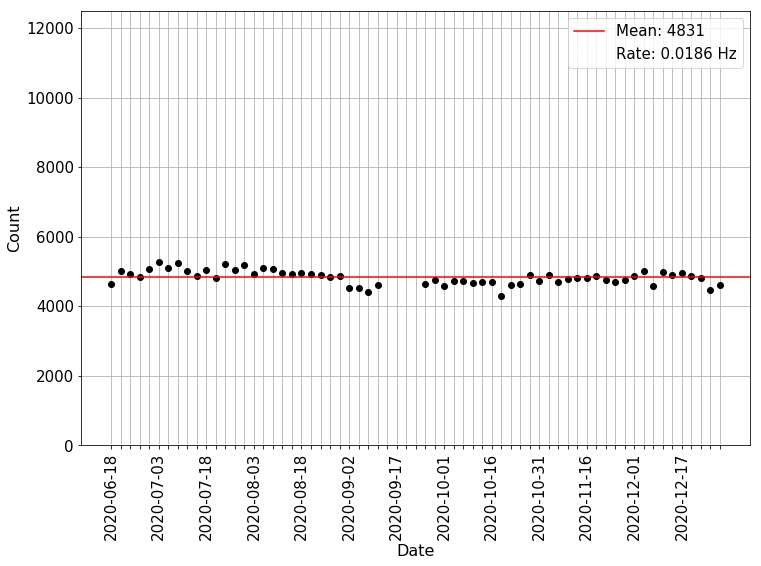

Freq EM:  0.0186 Hz
Freq eventos: 190 Hz
Razao EM / eventos:  0.0098 %


In [36]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 15})

plt.plot(list_dtd_2, h_list_ev20_60kDUQ, 'ko', linewidth=3) #, label='Soma de eventos de 20KDUQ a 60KDUQ')

list_dtd_lab = []
for i in range(len(list_dtd_2)):
    if (i % 5 == 0):
        list_dtd_lab.append(list_dtd_2[i])
    else:
        list_dtd_lab.append('')
        
plt.ylim(0,12500)

list_mean_em = []

for j in range(len(h_list_ev20_60kDUQ)):
    if (h_list_ev20_60kDUQ[j]>100):
        list_mean_em.append(h_list_ev20_60kDUQ[j])

EM_rate = round(np.mean(list_mean_em)/72/60/60,4)

#plt.axhline(np.mean(list_mean_em),color='red',
#            label='Mean: {:.0f} $\pm$ {:.0f}'.format(np.mean(list_mean_em),np.std(list_mean_em)))
plt.axhline(np.mean(list_mean_em),color='red',
            label='Mean: {:.0f}'.format(np.mean(list_mean_em)))
plt.axhline(EM_rate,color='white',label='Rate: {:.4f} Hz'.format(EM_rate))
#plt.axhline(EM_rate,color='white',label='Ratio EM / Trigger: {:.4f} %'.format(EM_rate/189.7*100))

plt.ylabel('Count', size=16)
plt.xlabel('Date', size=16)
plt.xticks(list_dtd_2, list_dtd_lab, rotation=90)
plt.legend(loc="upper right")
plt.grid()

#plt.title('Count of Electrons Michel candidates (06/23/2020 - 10/30/2020)\n', size=16,y=1.02)

plt.savefig('histogramas/Params_ev20_60KDUQ.png')
plt.show()

print('Freq EM: ',round(np.mean(list_mean_em)/72/60/60,4),'Hz')
print('Freq eventos: 190 Hz')
print('Razao EM / eventos: ',round((round(np.mean(list_mean_em)/72/60/60,4)/190)*100,4),'%')

In [ ]:
h_PDP_Sgn=[]
h_PDD_Sgn=[]
h_PDT_Sgn=[]

h_PDP_Sgn, h_PDD_Sgn, h_PDT_Sgn = load_PD ('PD_SGN_Michel_72h_ind_0')  #Sinal

print(h_PDP_Sgn)

h_PDP_Bck=[]
h_PDD_Bck=[]
h_PDT_Bck=[]

h_PDP_Bck, h_PDD_Bck, h_PDT_Bck = load_PD ('PD_BCK_Michel_72h_ind_0')  #Sinal

print(h_PDP_Bck)

fnt_trace_fit_EM(h_PDD_Sgn, h_PDD_Bck,'(01 - 03/07/2020)','Hist_Michel_Sgn_72h_ind_0')

## Gaussians

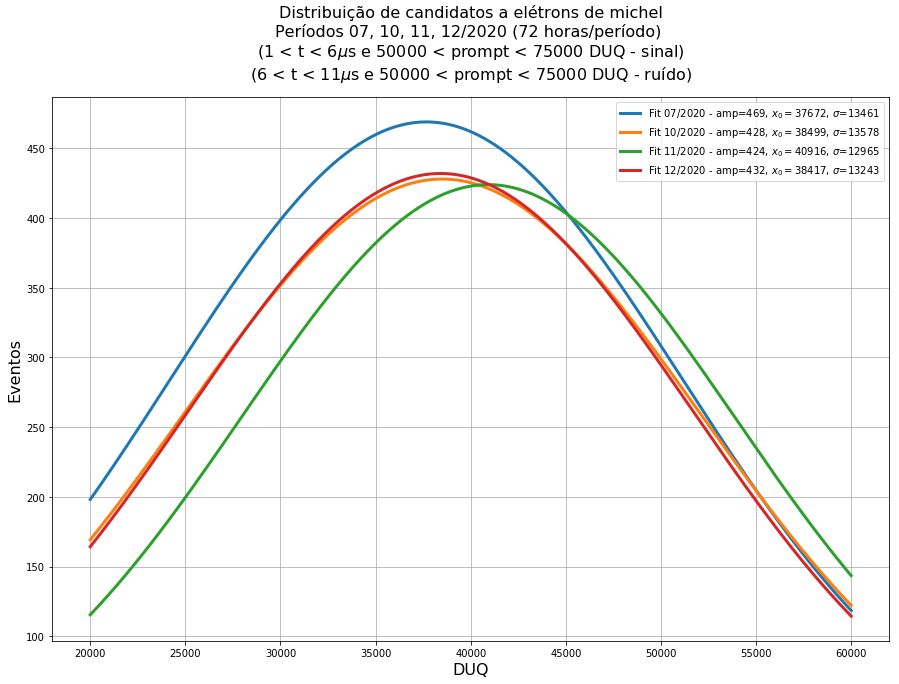

In [94]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 10})

xh_data = np.linspace(20000, 60000, num=40000)

params_h = [469, 37672, 13461] 
plt.plot(xh_data, fnt_fit_gauss_2(xh_data, params_h[0], params_h[1], params_h[2]), 
         label='Fit 07/2020 - amp={:0.0f}, $x_0=${:0.0f}, $\sigma$={:0.0f}'.format(params_h[0], params_h[1], params_h[2]), linewidth=3)

params_h = [428, 38499, 13578] 
plt.plot(xh_data, fnt_fit_gauss_2(xh_data, params_h[0], params_h[1], params_h[2]), 
         label='Fit 10/2020 - amp={:0.0f}, $x_0=${:0.0f}, $\sigma$={:0.0f}'.format(params_h[0], params_h[1], params_h[2]), linewidth=3)

params_h = [424, 40916, 12965] 
plt.plot(xh_data, fnt_fit_gauss_2(xh_data, params_h[0], params_h[1], params_h[2]), 
         label='Fit 11/2020 - amp={:0.0f}, $x_0=${:0.0f}, $\sigma$={:0.0f}'.format(params_h[0], params_h[1], params_h[2]), linewidth=3)

params_h = [432, 38417, 13243] 
plt.plot(xh_data, fnt_fit_gauss_2(xh_data, params_h[0], params_h[1], params_h[2]), 
         label='Fit 12/2020 - amp={:0.0f}, $x_0=${:0.0f}, $\sigma$={:0.0f}'.format(params_h[0], params_h[1], params_h[2]), linewidth=3)

plt.ylabel('Eventos', size=16)
plt.xlabel('DUQ', size=16)
plt.legend(loc="upper right")
plt.grid()

plt.title('Distribuição de candidatos a elétrons de michel\n'+
          'Períodos 07, 10, 11, 12/2020 (72 horas/período) \n'+
          '(1 < t < 6$\mu$s e 50000 < prompt < 75000 DUQ - sinal)\n'+
          '(6 < t < 11$\mu$s e 50000 < prompt < 75000 DUQ - ruído)'
          , size=16,y=1.02)


plt.savefig('histogramas/Gauss_Michel_2020_commis.png')
plt.show()
